# Crowdfunding Visual Data Analysis

# Table of contents
1. [Introduction](#introduction)
2. [Descriptive Statistics](#descriptivestatistics)
3. [Univariate Exploration](#univariateexploration)

# Introduction <a name="introduction"></a>
Some introduction text, formatted in heading 2 style


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# style settings
# uncoment the below to avoid collapsing of dataframes
# pd.set_option('display.max_rows', 2500)
# pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', -1)

## Launch data and prepare for analysis

In [2]:
file_name =  './data/kickstarter_master{}.csv'
master_df = pd.concat([pd.read_csv(file_name.format(i)) for i in range(1,4)])
master_df.reset_index(drop=True, inplace=True)
master_df.head()

,project_id,project_name,url,blurb,category,subcategory,image,slug,created_at,launched_at,...,staff_pick,currency,goal_real,goal_current_usd,goal_hist_usd,pledged_real,pledged_current_usd,pledged_hist_usd,current_fx_rate(usd),hist_exchange_rate(usd)
0,3710988,LEGO® PUZZLES (Canceled),https://www.kickstarter.com/projects/legopuzzle/lego-puzzles,lego puzzles,Games,Puzzles,https://ksr-ugc.imgix.net/assets/024/767/570/817881efdb3234a25fd09022206a427c_original.JPG?ixlib=rb-1.1.0&crop=faces&w=352&h=198&fit=crop&v=1555266098&auto=format&frame=1&q=92&s=4af78c48954c47e8981316dbec8ac1bd,lego-puzzles,2019-04-14 18:15:54,2019-04-16 17:19:19,...,False,CAD,10000.0,7431.741181,7449.298491,61.29,34.180887,34.261638,1.34558,1.342408
1,3704924,We Are Heroes (Canceled),https://www.kickstarter.com/projects/stevelaudisi/we-are-heroes,The fate of the world rests in the hands of a modern day Breakfast Club! Help them save the Earth!,Film & Video,Action,https://ksr-ugc.imgix.net/assets/024/762/349/47f2bc9e1752616d4eef2dc8c140dd6d_original.jpg?ixlib=rb-1.1.0&crop=faces&w=352&h=198&fit=crop&v=1555202395&auto=format&frame=1&q=92&s=183d98edf69bb509c219d6ec972f8d3e,we-are-heroes,2019-04-05 19:21:30,2019-04-15 21:13:55,...,False,USD,60000.0,60000.000000,60000.000000,111.00,111.000000,111.000000,1.00000,1.000000
2,3705068,"""The Jewelry Quilt""",https://www.kickstarter.com/projects/thejewelryquilt/the-jewelry-quilt,The perfect way to transport jewelry and keep it safe.,Fashion,Jewelry,https://ksr-ugc.imgix.net/assets/024/675/290/79eac64356495dd72a16e69fd964cc95_original.jpeg?ixlib=rb-1.1.0&crop=faces&w=352&h=198&fit=crop&v=1554509625&auto=format&frame=1&q=92&s=e2fb754073229614eb28fc0ee793489b,the-jewelry-quilt,2019-04-05 23:45:23,2019-04-12 22:18:59,...,False,USD,1000.0,1000.000000,1000.000000,3.00,3.000000,3.000000,1.00000,1.000000
3,3710011,Phan Wooden Pins (Canceled),https://www.kickstarter.com/projects/billacookie/phan-wooden-pins,Dan and Phil Pastel Wooden pins,Art,Digital Art,https://ksr-ugc.imgix.net/assets/024/753/081/5cf90e44ed20e58b130d882a9a8c5b93_original.jpg?ixlib=rb-1.1.0&crop=faces&w=352&h=198&fit=crop&v=1555104704&auto=format&frame=1&q=92&s=1f37af94d5e825ec7aa2d7ea9016298c,phan-wooden-pins,2019-04-12 20:38:46,2019-04-12 22:13:10,...,False,GBP,150.0,190.000906,195.304348,54.00,89.603697,92.104780,0.78947,0.768032
4,3688445,Jeff Pitchell's Picks - An album of rock-n-roll & blues hits (Canceled),https://www.kickstarter.com/projects/jeffpitchell/jeff-pitchells-picks-an-album-of-rock-n-roll-and-b,"A narrated retrospective of my best tracks, new material for the fans, and exclusive content.",Music,Blues,https://ksr-ugc.imgix.net/assets/024/724/551/17b05c481ec42f0c7f82615f45b768c0_original.jpg?ixlib=rb-1.1.0&crop=faces&w=352&h=198&fit=crop&v=1554911202&auto=format&frame=1&q=92&s=e564e02e9350080111c842be4ab75838,jeff-pitchells-picks-an-album-of-rock-n-roll-and-b,2019-03-13 14:58:43,2019-04-12 17:39:25,...,False,USD,6500.0,6500.000000,6500.000000,530.00,530.000000,530.000000,1.00000,1.000000


In [3]:
# Create a separate data frame for completed project only
ks_compl = master_df.query('(status == "successful") | (status == "failed")')
ks_compl.status.value_counts()

successful    95452
failed        74213
Name: status, dtype: int64

In [4]:
# To category
master_df['country'] = master_df['country'].astype('category')
master_df['currency'] = master_df['currency'].astype('category')
master_df['status'] = master_df['status'].astype('category')
master_df['category'] = master_df['category'].astype('category')
master_df['subcategory'] = master_df['subcategory'].astype('category')

# to date time
master_df[['created_at', 'launched_at', 'state_changed_at', 'deadline', 'last_update_at']] = master_df[['created_at', 'launched_at', 'state_changed_at', 'deadline', 'last_update_at']].apply(pd.to_datetime)

In [5]:
# engineer variable to asses funding duration
master_df['duration'] = master_df['deadline'] - master_df['launched_at']
master_df[['launched_at', 'deadline', 'duration']].sample(10)

,launched_at,deadline,duration
15502,2018-09-04 09:09:36,2018-10-09 21:00:00,35 days 11:50:24
64886,2016-11-02 17:51:40,2016-12-02 18:51:40,30 days 01:00:00
933,2019-03-08 04:50:04,2019-04-07 03:50:04,29 days 23:00:00
45472,2017-07-23 14:01:15,2017-08-22 14:01:15,30 days 00:00:00
88717,2016-01-08 10:03:18,2016-02-22 10:03:18,45 days 00:00:00
170946,2012-04-27 00:11:52,2012-06-01 09:11:00,35 days 08:59:08
137044,2014-09-05 16:31:24,2014-10-19 03:00:00,43 days 10:28:36
96318,2015-10-07 16:37:05,2015-11-11 17:37:05,35 days 01:00:00
42831,2017-08-29 20:46:52,2017-09-18 20:46:52,20 days 00:00:00
72730,2016-07-15 10:35:20,2016-07-31 11:00:00,16 days 00:24:40


In [6]:
master_df[['created_at', 'launched_at', 'state_changed_at', 'deadline', 'last_update_at', 'duration']].head()

,created_at,launched_at,state_changed_at,deadline,last_update_at,duration
0,2019-04-14 18:15:54,2019-04-16 17:19:19,2019-04-17 12:24:10,2019-05-16 17:19:19,2019-04-14 18:15:54,30 days 00:00:00
1,2019-04-05 19:21:30,2019-04-15 21:13:55,2019-04-18 00:35:15,2019-05-15 21:13:55,2019-04-05 19:21:30,30 days 00:00:00
2,2019-04-05 23:45:23,2019-04-12 22:18:59,2019-04-13 22:19:00,2019-04-13 22:18:59,2019-04-05 23:45:23,1 days 00:00:00
3,2019-04-12 20:38:46,2019-04-12 22:13:10,2019-04-17 16:27:42,2019-05-12 22:13:10,2019-04-12 20:38:46,30 days 00:00:00
4,2019-03-13 14:58:43,2019-04-12 17:39:25,2019-04-12 20:41:36,2019-06-04 19:01:00,2019-03-13 14:58:43,53 days 01:21:35


In [7]:
master_df[['created_at', 'launched_at', 'state_changed_at', 'deadline', 'last_update_at', 'duration']].tail()

,created_at,launched_at,state_changed_at,deadline,last_update_at,duration
178877,2009-04-22 02:11:10,2009-05-01 15:44:25,2009-06-05 07:00:24,2009-06-05 06:59:00,2015-03-09 15:43:20,34 days 15:14:35
178878,2009-05-01 11:38:34,2009-05-01 12:22:21,2009-05-31 11:45:17,2009-05-31 11:38:00,2015-03-09 15:43:20,29 days 23:15:39
178879,2009-04-29 19:52:44,2009-04-29 21:11:15,2009-06-15 19:00:31,2009-06-15 19:00:00,2015-03-09 15:43:20,46 days 21:48:45
178880,2009-04-29 16:40:26,2009-04-29 20:08:13,2009-07-04 16:45:20,2009-07-04 16:40:00,2015-03-09 15:43:20,65 days 20:31:47
178881,2009-04-27 04:44:17,2009-04-28 11:55:41,2009-05-16 10:00:25,2009-05-16 09:59:00,2015-03-09 15:43:20,17 days 22:03:19



# Descriptive Statistics <a name="descriptivestatistics"></a>
Some introduction text, formatted in heading 2 style

In [8]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178882 entries, 0 to 178881
Data columns (total 34 columns):
project_id                 178882 non-null int64
project_name               178882 non-null object
url                        178882 non-null object
blurb                      178882 non-null object
category                   178882 non-null category
subcategory                178882 non-null category
image                      178882 non-null object
slug                       178882 non-null object
created_at                 178882 non-null datetime64[ns]
launched_at                178882 non-null datetime64[ns]
deadline                   178882 non-null datetime64[ns]
state_changed_at           178882 non-null datetime64[ns]
last_update_at             178882 non-null datetime64[ns]
status                     178882 non-null category
creator_id                 178882 non-null int64
creator_name               178881 non-null object
country                    178873 non-null ca

In [9]:
projects_unique = master_df.project_id.nunique()
projects_unique

178882

In [10]:
creators_unique = master_df.creator_id.nunique()
creators_unique

154552

In [11]:
master_df.describe()

,project_id,creator_id,backers_count,goal_real,goal_current_usd,goal_hist_usd,pledged_real,pledged_current_usd,pledged_hist_usd,current_fx_rate(usd),hist_exchange_rate(usd),duration
count,1.788820e+05,1.788820e+05,178882.000000,1.788820e+05,1.788820e+05,1.788820e+05,1.788820e+05,1.788820e+05,1.788820e+05,178882.000000,178882.000000,178882
mean,2.100918e+06,1.074554e+09,133.035493,5.273863e+04,4.384505e+04,4.484346e+04,1.557759e+04,1.149526e+04,1.168967e+04,1.459641,1.435317,32 days 18:49:55.724136
std,1.054805e+06,6.202155e+08,855.913465,1.248093e+06,1.149428e+06,1.183966e+06,2.785835e+05,8.214388e+04,8.315025e+04,4.480027,4.508494,11 days 19:37:11.072686
min,1.900000e+01,3.000000e+00,0.000000,1.000000e-02,1.000000e-02,1.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.789470,0.582605,1 days 00:00:00
25%,1.291359e+06,5.374859e+08,3.000000,1.500000e+03,1.500000e+03,1.500000e+03,7.200000e+01,6.100000e+01,6.300000e+01,1.000000,1.000000,29 days 23:00:00
50%,2.217290e+06,1.073594e+09,23.000000,5.000000e+03,5.000000e+03,5.000000e+03,1.270000e+03,1.195000e+03,1.220000e+03,1.000000,1.000000,30 days 00:00:00
75%,3.042017e+06,1.612539e+09,80.000000,1.500000e+04,1.342440e+04,1.413008e+04,6.095000e+03,5.775000e+03,5.900000e+03,1.000000,1.000000,34 days 15:30:08.250000
max,3.710988e+06,2.147483e+09,105857.000000,1.000000e+08,1.266673e+08,1.500993e+08,8.103074e+07,8.596475e+06,8.596475e+06,109.600429,113.940122,93 days 02:32:04


In [17]:
ks_compl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169665 entries, 2 to 178881
Data columns (total 33 columns):
project_id                 169665 non-null int64
project_name               169665 non-null object
url                        169665 non-null object
blurb                      169665 non-null object
category                   169665 non-null object
subcategory                169665 non-null object
image                      169665 non-null object
slug                       169665 non-null object
created_at                 169665 non-null object
launched_at                169665 non-null object
deadline                   169665 non-null object
state_changed_at           169665 non-null object
last_update_at             169665 non-null object
status                     169665 non-null object
creator_id                 169665 non-null int64
creator_name               169664 non-null object
country                    169656 non-null object
city                       169665 non-nul

In [18]:
ks_compl.describe()

,project_id,creator_id,backers_count,goal_real,goal_current_usd,goal_hist_usd,pledged_real,pledged_current_usd,pledged_hist_usd,current_fx_rate(usd),hist_exchange_rate(usd)
count,1.696650e+05,1.696650e+05,169665.000000,1.696650e+05,1.696650e+05,1.696650e+05,1.696650e+05,1.696650e+05,1.696650e+05,169665.000000,169665.000000
mean,2.097850e+06,1.074555e+09,139.441346,4.833759e+04,3.999197e+04,4.090566e+04,1.629429e+04,1.201440e+04,1.221735e+04,1.461080,1.437195
std,1.062318e+06,6.204188e+08,878.212002,1.157584e+06,1.072287e+06,1.106017e+06,2.859968e+05,8.423011e+04,8.526236e+04,4.545683,4.574976
min,1.900000e+01,3.000000e+00,0.000000,1.000000e-02,1.000000e-02,1.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.789470,0.582605
25%,1.274156e+06,5.365875e+08,3.000000,1.500000e+03,1.500000e+03,1.500000e+03,1.000000e+02,8.800000e+01,9.012084e+01,1.000000,1.000000
50%,2.220164e+06,1.073975e+09,26.000000,5.000000e+03,5.000000e+03,5.000000e+03,1.499000e+03,1.381000e+03,1.417550e+03,1.000000,1.000000
75%,3.047911e+06,1.612919e+09,85.000000,1.500000e+04,1.266673e+04,1.319427e+04,6.460000e+03,6.147000e+03,6.243000e+03,1.000000,1.000000
max,3.705509e+06,2.147483e+09,105857.000000,1.000000e+08,1.266673e+08,1.500993e+08,8.103074e+07,8.596475e+06,8.596475e+06,109.600429,113.940122


In [23]:
n_compl_projects = ks_compl.project_id.nunique()
n_compl_projects

169665

In [20]:
n_compl_creators_unique = ks_compl.creator_id.nunique()
n_compl_creators_unique

147272

We got a data set consisting of 17,888 Kickstarter projects over the time period of 10 years of Kickstarter's existence. The first projects are from April 2009 and the youngest projects ended in May 2019. 

# Univariate Exploration <a name='univariateexploration'></a>
Let's start our exploration by looking at the main domain of interest: How successful were projects? 


In [12]:
master_df.status.value_counts()

successful    95452
failed        74213
canceled      8587 
suspended     630  
Name: status, dtype: int64

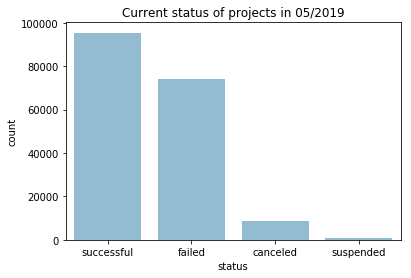

In [13]:
base_color = sns.color_palette("Blues_r")[3]
# create ordering
order = master_df.status.value_counts().index

sns.countplot(data=master_df, x='status', color=base_color, order=order);
plt.title("Current status of projects in 05/2019");

### Project success in percentages

In [14]:
n_success = len(master_df[master_df.status == "successful"])
n_failed = len(master_df[master_df.status == "failed"])
n_canceled = len(master_df[master_df.status == "canceled"])
n_suspended = len(master_df[master_df.status == "suspended"])

In [15]:
# all projects
p_success = n_success / projects_unique
p_failed = n_failed / projects_unique
p_canceled = n_canceled / projects_unique
p_suspended = n_suspended / projects_unique
print("Success: {}%".format(round(p_success*100,2)))
print("Failed: {}%".format(round(p_failed*100, 2)))
print("Canceled: {}%".format(round(p_canceled*100, 2))) 
print("Suspended: {}%".format(round(p_suspended*100, 2))) 

Success: 53.36%
Failed: 41.49%
Canceled: 4.8%
Suspended: 0.35%


In [25]:
# completed projects
n_compl_success = len(ks_compl[ks_compl.status == "successful"])
n_compl_fail = len(ks_compl[ks_compl.status == "failed"])
p_compl_success = n_compl_success / n_compl_projects
p_compl_fail = n_compl_fail / n_compl_projects
print("Success: {}%".format(round(p_compl_success*100,2)))
print("Failed: {}%".format(round(p_compl_fail*100, 2)))


Success: 56.26%
Failed: 43.74%


What are predictors of a project's failure and success?
Why are projects usually canceled or suspended?